In [1]:
%load_ext autoreload

In [2]:
%autoreload 
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from pvlib import solarposition
# from dataprep.eda import create_report

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [3]:
from featurewiz import FeatureWiz

Imported 0.3.2 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False, skip_xgboost=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



# Import the processed data

In [4]:
data_path = '../data_preprocessed/'
save_path = '../data_feature_enigineering/'

In [25]:
df = pd.read_csv(f'{data_path}df_mean.csv')
df = df.set_index('date_forecast')
df.index = pd.to_datetime(df.index)
df.head()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,pv_measurement,building
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-06-02 22:00:00,7.700,1.22825,1728.950,0.00,0.00,1728.950,0.0,280.300,0.000,0.000,...,0.0,286.225,100.000,40386.477,3.600,-3.575,-0.500,0.0,0.00,0
2019-06-02 23:00:00,7.700,1.22350,1689.825,0.00,0.00,1689.825,0.0,280.300,0.000,0.000,...,0.0,286.900,100.000,33770.650,3.350,-3.350,0.275,0.0,0.00,0
2019-06-03 00:00:00,7.875,1.21975,1563.225,0.00,0.00,1563.225,0.0,280.650,0.000,0.000,...,0.0,286.950,100.000,13595.500,3.050,-2.950,0.750,0.0,0.00,0
2019-06-03 01:00:00,8.425,1.21800,1283.425,208.65,0.75,1283.425,0.0,281.675,0.300,526.775,...,0.0,286.750,100.000,2321.850,2.725,-2.600,0.875,0.0,0.00,0
2019-06-03 02:00:00,8.950,1.21800,1003.500,32468.15,23.10,1003.500,0.0,282.500,11.975,22068.950,...,0.0,286.450,99.225,11634.800,2.550,-2.350,0.925,0.0,19.36,0


In [26]:
df.isna().sum()

absolute_humidity_2m:gm3              0
air_density_2m:kgm3                   0
ceiling_height_agl:m              16417
clear_sky_energy_1h:J                 0
clear_sky_rad:W                       0
cloud_base_agl:m                   6738
dew_or_rime:idx                       0
dew_point_2m:K                        0
diffuse_rad:W                         0
diffuse_rad_1h:J                      0
direct_rad:W                          0
direct_rad_1h:J                       0
effective_cloud_cover:p               0
elevation:m                           0
fresh_snow_12h:cm                     0
fresh_snow_1h:cm                      0
fresh_snow_24h:cm                     0
fresh_snow_3h:cm                      0
fresh_snow_6h:cm                      0
is_day:idx                            0
is_in_shadow:idx                      0
msl_pressure:hPa                      0
precip_5min:mm                        0
precip_type_5min:idx                  0
pressure_100m:hPa                     0


In [27]:
X_test = pd.read_csv(f'{data_path}X_test_mean.csv')
X_test = X_test.set_index('date_forecast')
X_test.index = pd.to_datetime(X_test.index)
X_test.date_calc = pd.to_datetime(X_test.date_calc)
X_test.head()

,date_calc,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,...,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,building
date_forecast,,,,,,,,,,,,,,,,,,,,,
2023-05-01 00:00:00,2023-04-30 07:00:04,4.325,1.28675,912.7000,0.000,0.000,1061.5500,0.0,271.65002,0.000,...,-10.5410,0.0,273.80000,74.950,29907.500,3.950,2.100,3.35,0.0,0
2023-05-01 01:00:00,2023-04-30 07:00:04,4.275,1.28600,1482.1000,0.000,0.000,1075.1001,0.0,271.45000,0.000,...,-7.8945,0.0,273.80000,77.475,29519.074,3.825,1.925,3.30,0.0,0
2023-05-01 02:00:00,2023-04-30 07:00:04,4.150,1.28375,1791.3000,0.000,0.000,1200.4000,0.0,271.05000,0.000,...,-3.8155,0.0,273.84998,88.100,31009.125,3.650,1.750,3.20,0.0,0
2023-05-01 03:00:00,2023-04-30 07:00:04,4.025,1.28200,2312.8750,10124.425,11.675,1179.8500,0.0,270.65000,9.375,...,1.4125,0.0,273.90000,68.600,34552.500,3.500,1.450,3.15,0.0,0
2023-05-01 04:00:00,2023-04-30 07:00:04,3.900,1.28100,2198.2998,141748.600,76.875,920.0500,0.0,270.37500,47.400,...,7.4685,0.0,273.92500,66.300,35483.875,3.325,1.300,3.05,0.0,0


### Add datetime features

In [28]:
# add datetime64 features to the dataframes such as hour, day, month, year, minute
df['hour'] = df.index.hour
df['day_of_week'] = df.index.day_of_week
df['quarter'] = df.index.quarter
df['month'] = df.index.month
# df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear
df['day'] = df.index.day
# df['minute'] = df.index.minute

X_test['hour'] = X_test.index.hour
X_test['day_of_week'] = X_test.index.day_of_week
X_test['quarter'] = X_test.index.quarter
X_test['month'] = X_test.index.month
# X_test['year'] = X_test.index.year
X_test['day_of_year'] = X_test.index.dayofyear
X_test['day'] = X_test.index.day
# X_test['minute'] = X_test.index.minute

In [29]:
df.isna().sum()

absolute_humidity_2m:gm3              0
air_density_2m:kgm3                   0
ceiling_height_agl:m              16417
clear_sky_energy_1h:J                 0
clear_sky_rad:W                       0
cloud_base_agl:m                   6738
dew_or_rime:idx                       0
dew_point_2m:K                        0
diffuse_rad:W                         0
diffuse_rad_1h:J                      0
direct_rad:W                          0
direct_rad_1h:J                       0
effective_cloud_cover:p               0
elevation:m                           0
fresh_snow_12h:cm                     0
fresh_snow_1h:cm                      0
fresh_snow_24h:cm                     0
fresh_snow_3h:cm                      0
fresh_snow_6h:cm                      0
is_day:idx                            0
is_in_shadow:idx                      0
msl_pressure:hPa                      0
precip_5min:mm                        0
precip_type_5min:idx                  0
pressure_100m:hPa                     0


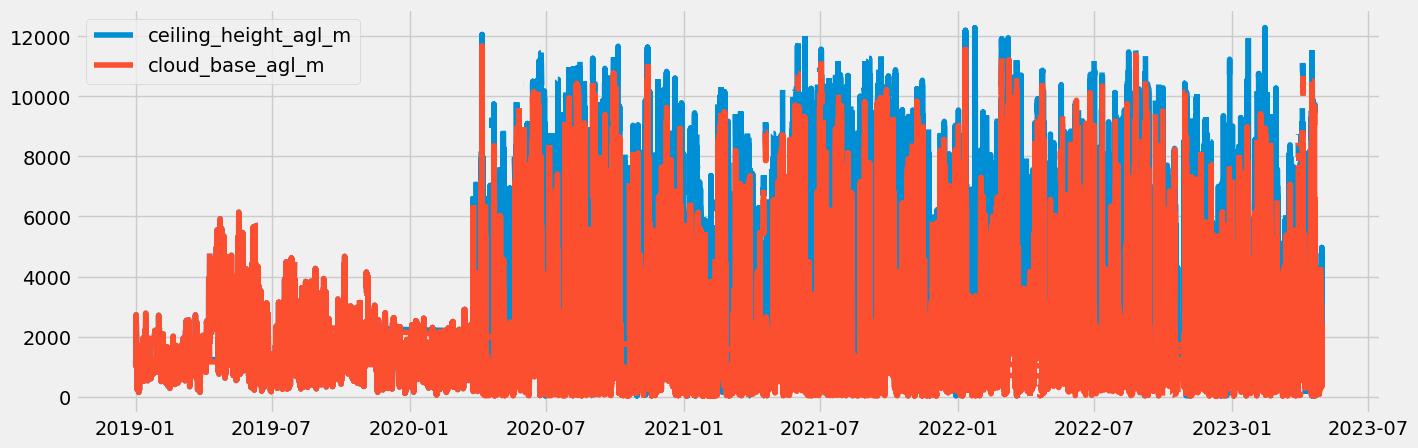

In [30]:
# plot ceiling_height_agl:m' and 'cloud_base_agl:m'
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df.index, df['ceiling_height_agl:m'], label='ceiling_height_agl_m')
ax.plot(df.index, df['cloud_base_agl:m'], label='cloud_base_agl_m')
ax.legend()

In [31]:
# use knn to impude the missing values for 'ceiling_height_agl:m' and 'cloud_base_agl:m'
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df[['ceiling_height_agl:m', 'cloud_base_agl:m']] = imputer.fit_transform(df[['ceiling_height_agl:m', 'cloud_base_agl:m']])
X_test[['ceiling_height_agl:m', 'cloud_base_agl:m']] = imputer.transform(X_test[['ceiling_height_agl:m', 'cloud_base_agl:m']])
df.isna().sum()

absolute_humidity_2m:gm3          0
air_density_2m:kgm3               0
ceiling_height_agl:m              0
clear_sky_energy_1h:J             0
clear_sky_rad:W                   0
cloud_base_agl:m                  0
dew_or_rime:idx                   0
dew_point_2m:K                    0
diffuse_rad:W                     0
diffuse_rad_1h:J                  0
direct_rad:W                      0
direct_rad_1h:J                   0
effective_cloud_cover:p           0
elevation:m                       0
fresh_snow_12h:cm                 0
fresh_snow_1h:cm                  0
fresh_snow_24h:cm                 0
fresh_snow_3h:cm                  0
fresh_snow_6h:cm                  0
is_day:idx                        0
is_in_shadow:idx                  0
msl_pressure:hPa                  0
precip_5min:mm                    0
precip_type_5min:idx              0
pressure_100m:hPa                 0
pressure_50m:hPa                  0
prob_rime:p                       0
rain_water:kgm2             

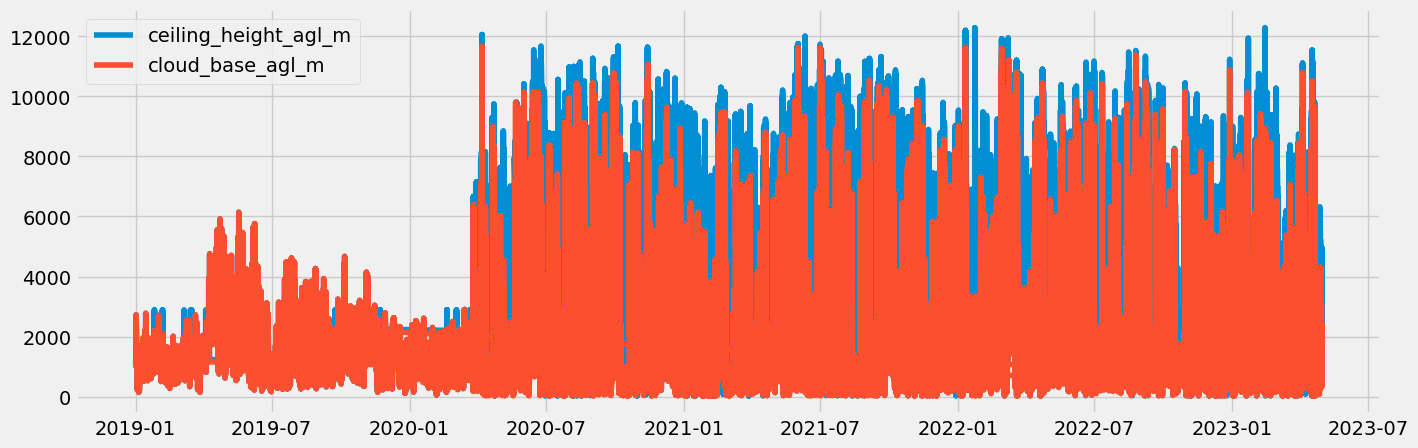

In [32]:
# plot ceiling_height_agl:m' and 'cloud_base_agl:m'
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df.index, df['ceiling_height_agl:m'], label='ceiling_height_agl_m')
ax.plot(df.index, df['cloud_base_agl:m'], label='cloud_base_agl_m')
ax.legend()

In [20]:
# make a csv with just the features we just ceiling_height_agl:m' and 'cloud_base_agl:m' columns
df[['ceiling_height_agl:m', 'cloud_base_agl:m']].to_csv('test.csv')

#### Adding some new features:

Trying some intuitive features

In [8]:
# # Derived Features
# df['temp_dewpoint_diff'] = df['dew_point_2m:K'] - df['t_1000hPa:K']
# df['solar_radiation_ratio'] = df['direct_rad:W'] / df['clear_sky_rad:W']

# # Weather-related Features
# df['wind_speed_magnitude'] = (df['wind_speed_u_10m:ms']**2 + df['wind_speed_v_10m:ms']**2 + df['wind_speed_w_1000hPa:ms']**2)**0.5
# df['cumulative_precipitation'] = df['precip_5min:mm'].rolling(window=12).sum()  # Sum over the past 1 hour (5*12 = 60 minutes)

# # Interaction Features
# df['temp_solar_interaction'] = df['t_1000hPa:K'] * df['direct_rad:W']

In [9]:
# # Derived Features
# X_test['temp_dewpoint_diff'] = X_test['dew_point_2m:K'] - X_test['t_1000hPa:K']
# X_test['solar_radiation_ratio'] = X_test['direct_rad:W'] / X_test['clear_sky_rad:W']

# # Weather-related Features
# X_test['wind_speed_magnitude'] = (X_test['wind_speed_u_10m:ms']**2 + X_test['wind_speed_v_10m:ms']**2 + X_test['wind_speed_w_1000hPa:ms']**2)**0.5
# X_test['cumulative_precipitation'] = X_test['precip_5min:mm'].rolling(window=12).sum()  # Sum over the past 1 hour (5*12 = 60 minutes)

# # Interaction Features
# X_test['temp_solar_interaction'] = X_test['t_1000hPa:K'] * X_test['direct_rad:W']

Trying some pv related features generated using a solar power library. NB assuming the buildings are located in Trondheim

In [10]:
# # Function to add solar-related features using pvlib
# def add_solar_features_pvlib(df):
#     # Fixed latitude and longitude
#     latitude = 63.430515
#     longitude = 10.395053

#     times = pd.to_datetime(df[['year','month', 'day', 'hour', 'minute']])
#     altitudes = df['elevation:m']
#     temperatures = df['t_1000hPa:K'] - 273.15
    
#     # Calculate solar positions
#     solar_position = solarposition.get_solarposition(times, latitude, longitude, altitudes, temperature=temperatures)

#     # Add solar position features to the dataframe
#     df['sun_zenith:d'] = solar_position['apparent_zenith']
#     df['sun_equation_of_time'] = solar_position['equation_of_time']

#     return df

In [11]:
# df = add_solar_features_pvlib(df)
# X_test = add_solar_features_pvlib(X_test)

In [33]:
df.head()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,pv_measurement,building,hour,day_of_week,quarter,month,day_of_year,day
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-06-02 22:00:00,7.700,1.22825,1728.950,0.00,0.00,1728.950,0.0,280.300,0.000,0.000,...,-0.500,0.0,0.00,0,22,6,2,6,153,2
2019-06-02 23:00:00,7.700,1.22350,1689.825,0.00,0.00,1689.825,0.0,280.300,0.000,0.000,...,0.275,0.0,0.00,0,23,6,2,6,153,2
2019-06-03 00:00:00,7.875,1.21975,1563.225,0.00,0.00,1563.225,0.0,280.650,0.000,0.000,...,0.750,0.0,0.00,0,0,0,2,6,154,3
2019-06-03 01:00:00,8.425,1.21800,1283.425,208.65,0.75,1283.425,0.0,281.675,0.300,526.775,...,0.875,0.0,0.00,0,1,0,2,6,154,3
2019-06-03 02:00:00,8.950,1.21800,1003.500,32468.15,23.10,1003.500,0.0,282.500,11.975,22068.950,...,0.925,0.0,19.36,0,2,0,2,6,154,3


In [34]:
X_test.head()

,date_calc,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,...,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,building,hour,day_of_week,quarter,month,day_of_year,day
date_forecast,,,,,,,,,,,,,,,,,,,,,
2023-05-01 00:00:00,2023-04-30 07:00:04,4.325,1.28675,912.7000,0.000,0.000,1061.5500,0.0,271.65002,0.000,...,2.100,3.35,0.0,0,0,0,2,5,121,1
2023-05-01 01:00:00,2023-04-30 07:00:04,4.275,1.28600,1482.1000,0.000,0.000,1075.1001,0.0,271.45000,0.000,...,1.925,3.30,0.0,0,1,0,2,5,121,1
2023-05-01 02:00:00,2023-04-30 07:00:04,4.150,1.28375,1791.3000,0.000,0.000,1200.4000,0.0,271.05000,0.000,...,1.750,3.20,0.0,0,2,0,2,5,121,1
2023-05-01 03:00:00,2023-04-30 07:00:04,4.025,1.28200,2312.8750,10124.425,11.675,1179.8500,0.0,270.65000,9.375,...,1.450,3.15,0.0,0,3,0,2,5,121,1
2023-05-01 04:00:00,2023-04-30 07:00:04,3.900,1.28100,2198.2998,141748.600,76.875,920.0500,0.0,270.37500,47.400,...,1.300,3.05,0.0,0,4,0,2,5,121,1


#### Automativ featued analysis and selection using FeatureWiz

In [35]:
FEATURES = list(df.columns)

FEATURES.remove('pv_measurement')

TARGET = 'pv_measurement'

X_train = df[FEATURES]
y_train = df[TARGET]

X_test = X_test[FEATURES]

In [36]:
FEATURES

['absolute_humidity_2m:gm3',
 'air_density_2m:kgm3',
 'ceiling_height_agl:m',
 'clear_sky_energy_1h:J',
 'clear_sky_rad:W',
 'cloud_base_agl:m',
 'dew_or_rime:idx',
 'dew_point_2m:K',
 'diffuse_rad:W',
 'diffuse_rad_1h:J',
 'direct_rad:W',
 'direct_rad_1h:J',
 'effective_cloud_cover:p',
 'elevation:m',
 'fresh_snow_12h:cm',
 'fresh_snow_1h:cm',
 'fresh_snow_24h:cm',
 'fresh_snow_3h:cm',
 'fresh_snow_6h:cm',
 'is_day:idx',
 'is_in_shadow:idx',
 'msl_pressure:hPa',
 'precip_5min:mm',
 'precip_type_5min:idx',
 'pressure_100m:hPa',
 'pressure_50m:hPa',
 'prob_rime:p',
 'rain_water:kgm2',
 'relative_humidity_1000hPa:p',
 'sfc_pressure:hPa',
 'snow_depth:cm',
 'snow_drift:idx',
 'snow_melt_10min:mm',
 'snow_water:kgm2',
 'sun_azimuth:d',
 'sun_elevation:d',
 'super_cooled_liquid_water:kgm2',
 't_1000hPa:K',
 'total_cloud_cover:p',
 'visibility:m',
 'wind_speed_10m:ms',
 'wind_speed_u_10m:ms',
 'wind_speed_v_10m:ms',
 'wind_speed_w_1000hPa:ms',
 'building',
 'hour',
 'day_of_week',
 'quarter'

wiz = FeatureWiz(verbose=1)
        X_train_selected = wiz.fit_transform(X_train, y_train)
        X_test_selected = wiz.transform(X_test)
        wiz.features  ### provides a list of selected features ###            
        
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Regression problem ####
    Loaded train data. Shape = (92951, 52)
    Some column names had special characters which were removed...
#### Single_Label Re

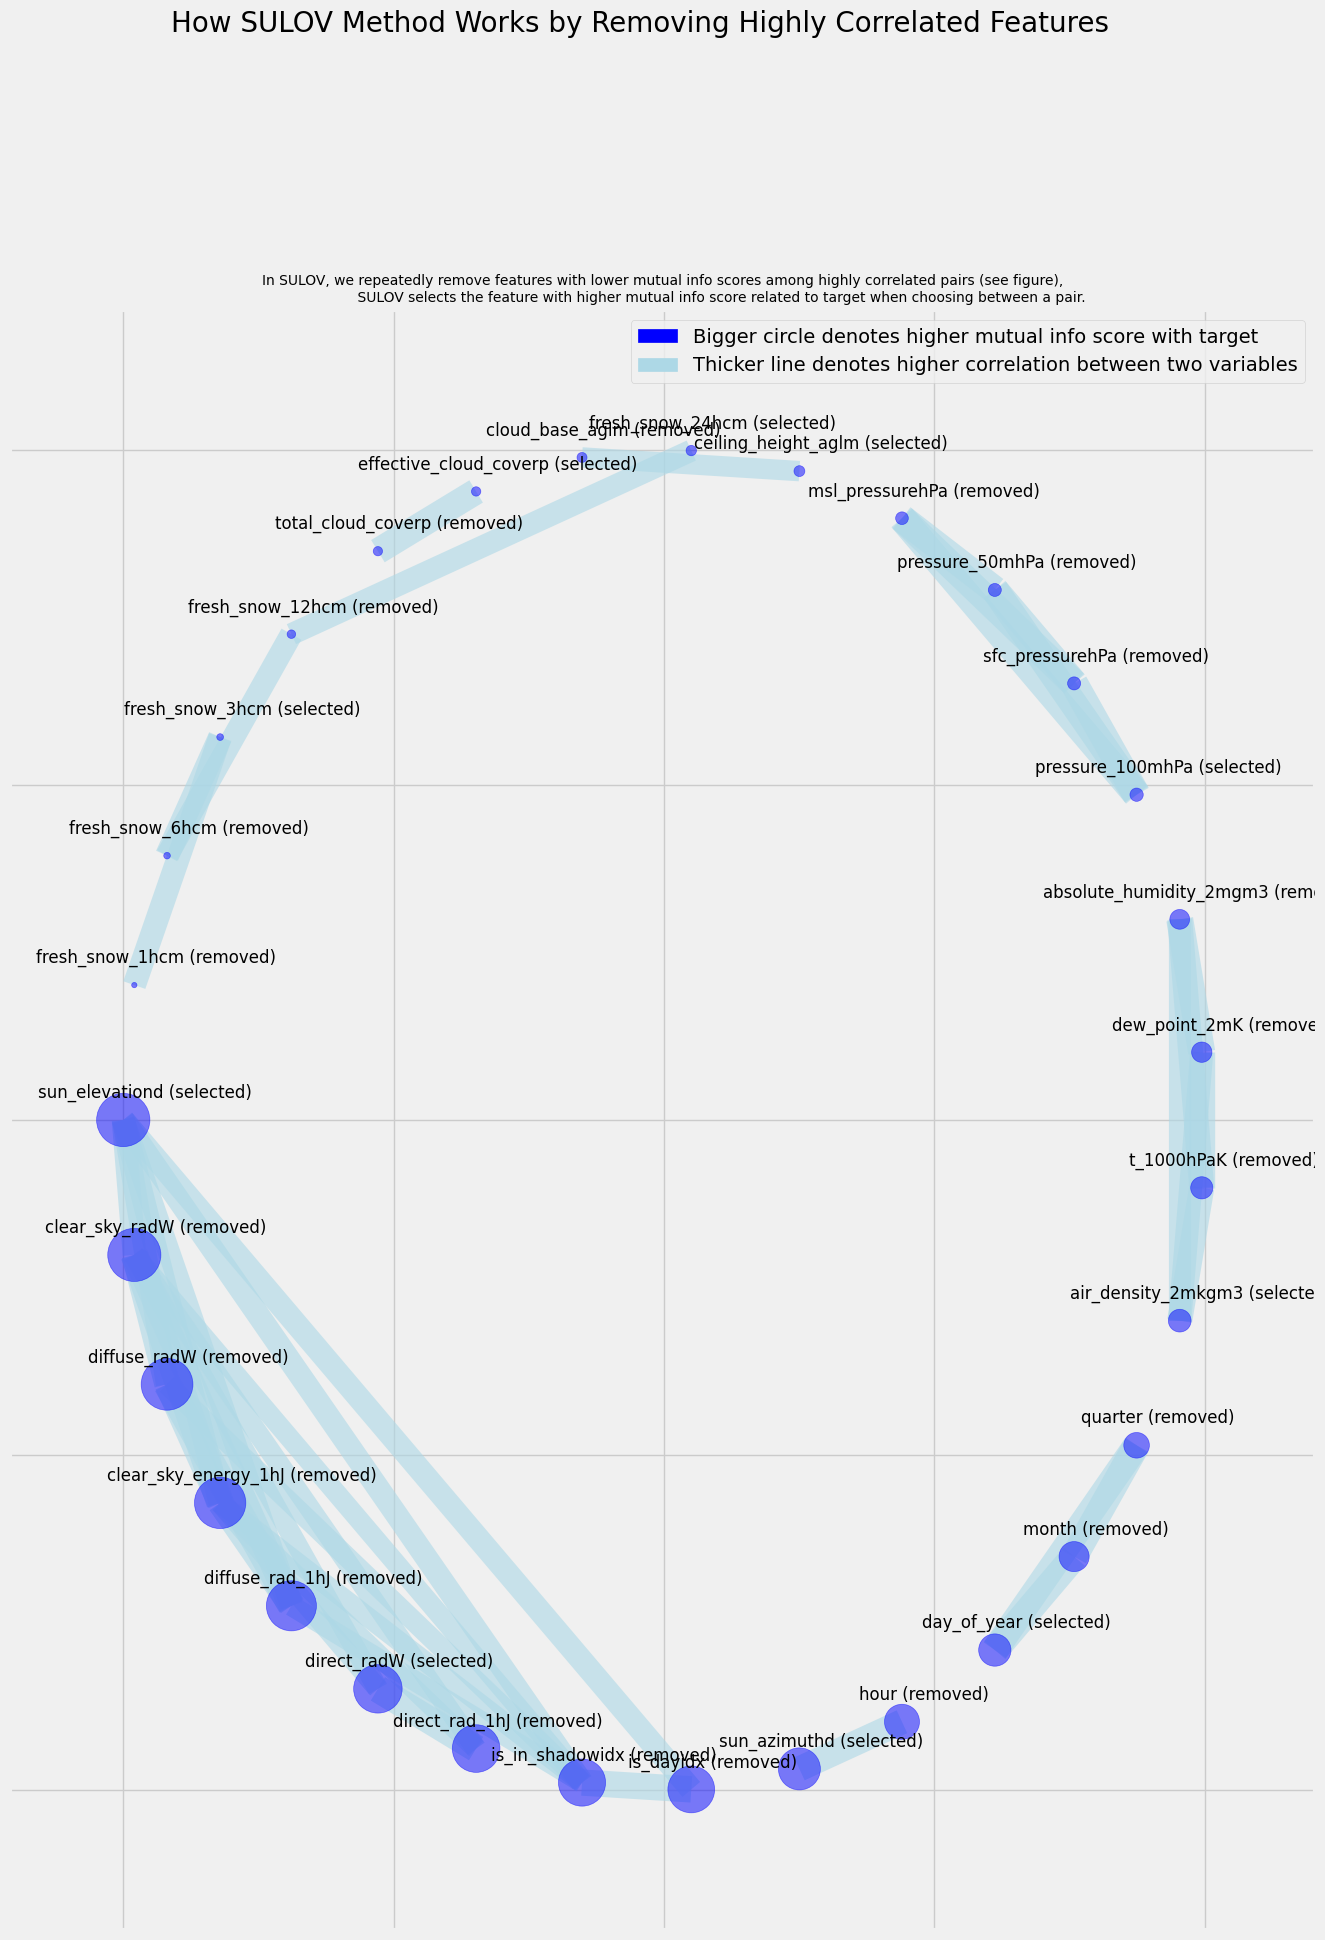

Time taken for SULOV method = 25 seconds
    Adding 0 categorical variables to reduced numeric variables  of 27
Final list of selected 27 vars after SULOV = ['dew_or_rimeidx', 'precip_5minmm', 'precip_type_5minidx', 'prob_rimep', 'rain_waterkgm2', 'relative_humidity_1000hPap', 'snow_depthcm', 'snow_melt_10minmm', 'snow_waterkgm2', 'super_cooled_liquid_waterkgm2', 'visibilitym', 'wind_speed_10mms', 'wind_speed_u_10mms', 'wind_speed_v_10mms', 'wind_speed_w_1000hPams', 'day_of_week', 'day', 'sun_elevationd', 'direct_radW', 'sun_azimuthd', 'day_of_year', 'air_density_2mkgm3', 'pressure_100mhPa', 'ceiling_height_aglm', 'fresh_snow_24hcm', 'effective_cloud_coverp', 'fresh_snow_3hcm']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#########################################################################

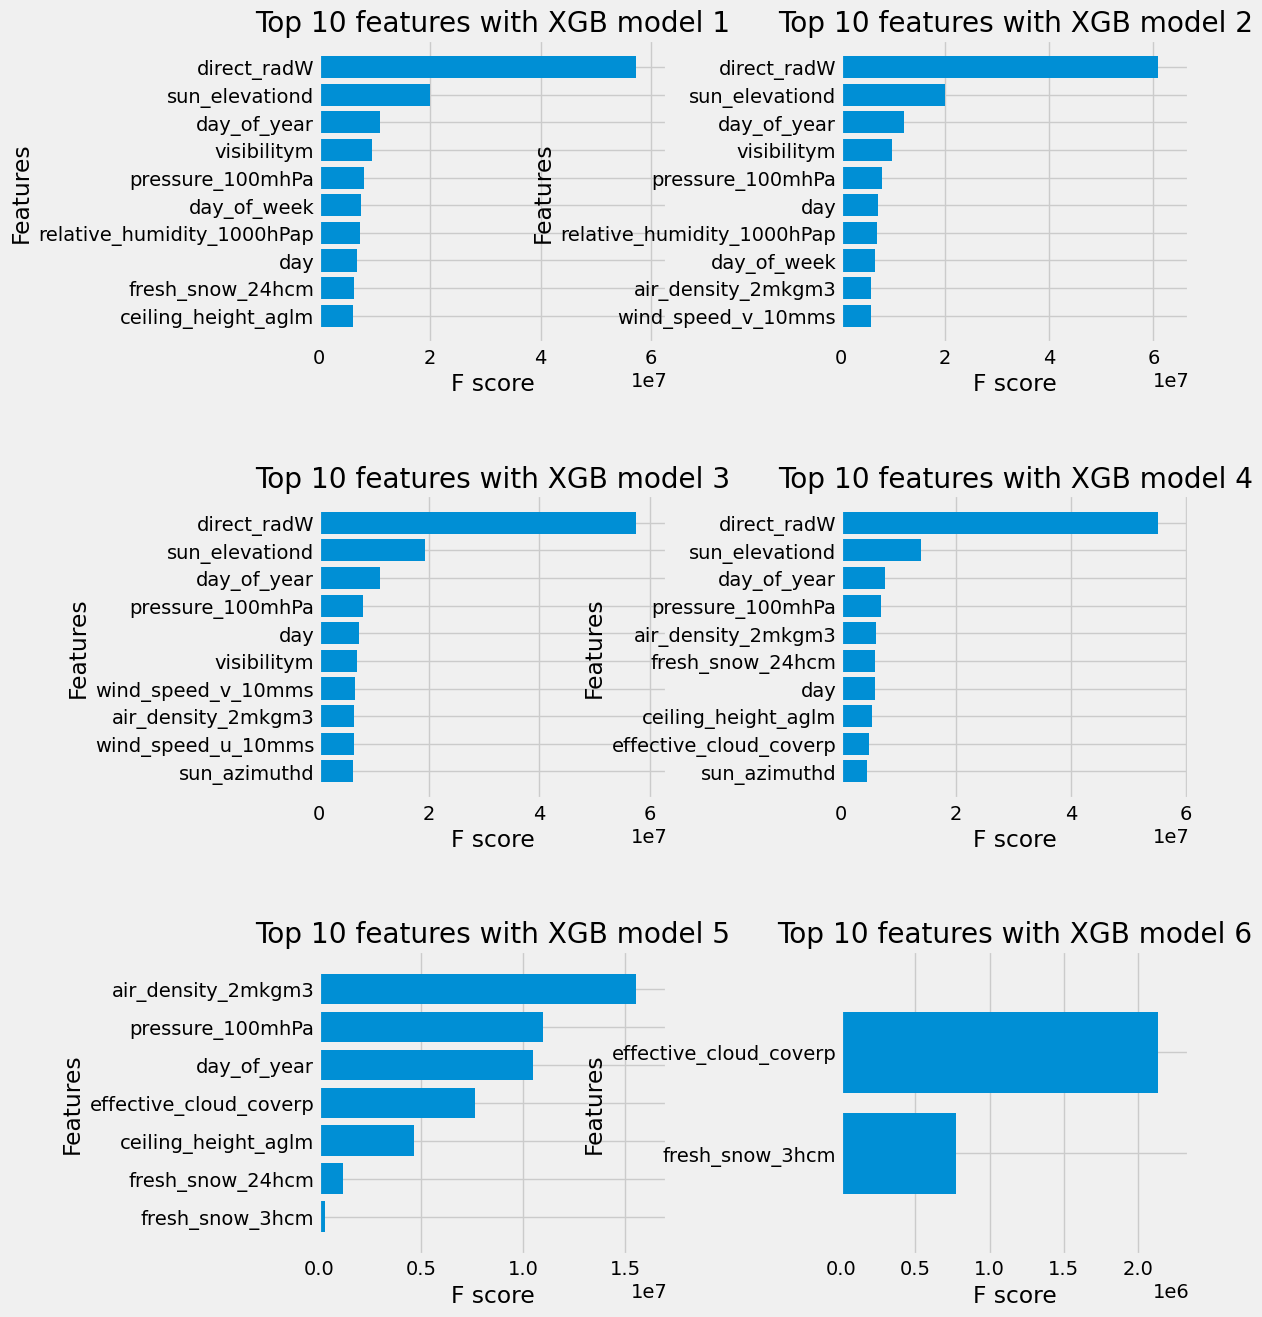

    Completed XGBoost feature selection in 2 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 17 important features:
['direct_radW', 'sun_elevationd', 'visibilitym', 'pressure_100mhPa', 'relative_humidity_1000hPap', 'day_of_year', 'air_density_2mkgm3', 'ceiling_height_aglm', 'wind_speed_u_10mms', 'wind_speed_v_10mms', 'sun_azimuthd', 'day', 'wind_speed_10mms', 'effective_cloud_coverp', 'day_of_week', 'fresh_snow_24hcm', 'fresh_snow_3hcm']
Total Time taken for featurewiz selection = 50 seconds
Output contains a list of 17 important features and a train dataframe
    Time taken to create entire pipeline = 50 second(s)


In [37]:
fwiz = FeatureWiz(corr_limit=0.7, feature_engg='', category_encoders='', dask_xgboost_flag=False, nrows=None, verbose=2)
X_train_selected = fwiz.fit_transform(X_train, y_train)
X_test_selected = fwiz.transform(X_test)
### get list of selected features ###
feats = fwiz.features  

In [38]:
X_train_selected.shape

(92951, 17)

In [39]:
X_test_selected.shape

(2160, 17)

In [40]:
X_train_selected

,direct_rad:W,sun_elevation:d,visibility:m,pressure_100m:hPa,relative_humidity_1000hPa:p,day_of_year,air_density_2m:kgm3,ceiling_height_agl:m,wind_speed_u_10m:ms,wind_speed_v_10m:ms,sun_azimuth:d,day,wind_speed_10m:ms,effective_cloud_cover:p,day_of_week,fresh_snow_24h:cm,fresh_snow_3h:cm
date_forecast,,,,,,,,,,,,,,,,,
2019-06-02 22:00:00,0.00,-3.77425,40386.477,993.75000,71.674995,153,1.22825,1728.950,-3.575,-0.500,348.036740,2,3.600,99.075,6,0.0,0.0
2019-06-02 23:00:00,0.00,-4.35725,33770.650,992.67500,68.000000,153,1.22350,1689.825,-3.350,0.275,91.980750,2,3.350,99.750,6,0.0,0.0
2019-06-03 00:00:00,0.00,-3.30950,13595.500,992.00000,67.950000,154,1.21975,1563.225,-2.950,0.750,14.934750,3,3.050,100.000,0,0.0,0.0
2019-06-03 01:00:00,0.00,-0.82250,2321.850,991.50000,73.875000,154,1.21800,1283.425,-2.600,0.875,28.630250,3,2.725,100.000,0,0.0,0.0
2019-06-03 02:00:00,0.15,3.05125,11634.800,990.55005,79.925000,154,1.21800,1003.500,-2.350,0.925,41.997500,3,2.550,84.875,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 19:00:00,0.00,-0.20150,25028.000,999.05000,74.800000,120,1.27550,1456.575,3.600,1.875,304.936500,30,4.075,97.725,6,0.3,0.0
2023-04-30 20:00:00,0.00,-5.20400,23995.600,999.02500,76.975000,120,1.27850,1476.350,2.950,2.125,318.620480,30,3.600,95.450,6,0.3,0.0
2023-04-30 21:00:00,0.00,-8.98450,23068.600,998.90000,77.725000,120,1.27900,1516.300,2.625,2.400,332.780240,30,3.600,93.925,6,0.3,0.0


In [41]:
X_test_selected

,direct_rad:W,sun_elevation:d,visibility:m,pressure_100m:hPa,relative_humidity_1000hPa:p,day_of_year,air_density_2m:kgm3,ceiling_height_agl:m,wind_speed_u_10m:ms,wind_speed_v_10m:ms,sun_azimuth:d,day,wind_speed_10m:ms,effective_cloud_cover:p,day_of_week,fresh_snow_24h:cm,fresh_snow_3h:cm
date_forecast,,,,,,,,,,,,,,,,,
2023-05-01 00:00:00,0.000000,-10.541000,29907.500,1000.550,80.275,121,1.28675,912.7000,2.100,3.350,16.02650,1,3.950,74.950,0,0.0,0.0
2023-05-01 01:00:00,0.000000,-7.894500,29519.074,1000.050,79.825,121,1.28600,1482.1000,1.925,3.300,30.49725,1,3.825,77.475,0,0.0,0.0
2023-05-01 02:00:00,0.000000,-3.815500,31009.125,999.500,78.000,121,1.28375,1791.3000,1.750,3.200,44.51725,1,3.650,88.100,0,0.0,0.0
2023-05-01 03:00:00,2.100000,1.412500,34552.500,998.975,75.625,121,1.28200,2312.8750,1.450,3.150,58.08300,1,3.500,68.600,0,0.0,0.0
2023-05-01 04:00:00,25.450000,7.468500,35483.875,998.550,74.225,121,1.28100,2198.2998,1.300,3.050,71.34100,1,3.325,66.300,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03 19:00:00,13.450001,8.131001,41007.900,977.575,71.650,184,1.19675,3493.6500,1.900,-1.075,306.68900,3,2.175,87.475,0,0.0,0.0
2023-07-03 20:00:00,2.400000,3.239500,41315.950,977.975,75.325,184,1.20000,3078.7500,2.000,-0.925,319.70300,3,2.200,78.075,0,0.0,0.0
2023-07-03 21:00:00,0.000000,-0.477000,41665.900,978.250,80.425,184,1.20350,2308.4000,2.050,-0.950,333.03723,3,2.250,79.550,0,0.0,0.0


In [21]:
# reintroduce the building feature to X_train_selected and X_test_selected
X_train_selected['building'] = df.building
X_test_selected['building'] = X_test.building


In [22]:
# create df_selected by adding the pv_measuerement column from df to X_train_selected
df_selected = X_train_selected
X_train_selected['pv_measurement'] = df.pv_measurement

In [23]:
# save X_train_selected and X_test_selected
df_selected.to_csv(f'{save_path}df_selected_preprocessed_mean.csv')
X_test_selected.to_csv(f'{save_path}X_test_selected_preprocessed_mean.csv')